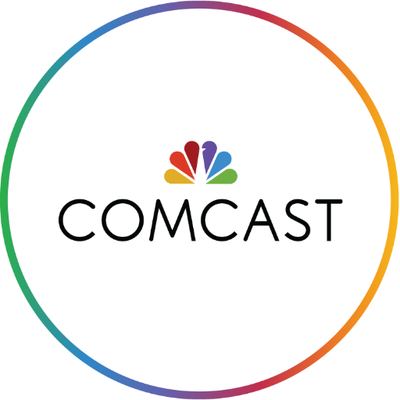

# Comcast Telecom Consumer Complaints Analysis.

#### Comcast
Comcast Corporation (formerly registered as Comcast Holdings) is an American telecommunications conglomerate headquartered in Philadelphia, Pennsylvania.It is the second-largest broadcasting and cable television company in the world by revenue and the largest pay-TV company, the largest cable TV company and largest home Internet service provider in the United States, and the nation's third-largest home telephone service provider.

Problem statement given:

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.


Data Dictionary

 - Ticket #: Ticket number assigned to each complaint
 - Customer Complaint: Description of complaint
 - Date: Date of complaint
 - Time: Time of complaint
 - Received Via: Mode of communication of the complaint
 - City: Customer city
 - State: Customer state
 - Zipcode: Customer zip
 - Status: Status of complaint
 - Filing on behalf of someone

-------------------------------

#### Importing packages

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
import re
import nltk


------------------------

## Importing the dataset

In [196]:
comcastdata = pd.read_csv(r"C:\Users\ijedf\OneDrive\Documents\Python\PythonProjects\Pythonprojects\comcast project\Comcast_telecom_complaints_data.csv")

---------------------------

## Data exploration, Data cleaning, Data wrangling

In [198]:
#Viewing the first seven entries

comcastdata.head(7)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No


In [200]:
#Taking a look at the column names 

comcastdata.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [202]:
#renaming the columns

comcastdata = comcastdata.rename(columns = {'Ticket #': 'Ticket'}, inplace = False)
comcastdata = comcastdata.rename(columns = {'Customer Complaint': 'CustomerComplaint'}, inplace = False)
comcastdata = comcastdata.rename(columns = {'Received Via': 'ReceivedVia'}, inplace = False)

In [204]:
#Viewing random entries in the data

comcastdata.sample(15)

,Ticket,CustomerComplaint,Date,Date_month_year,Time,ReceivedVia,City,State,Zip code,Status,Filing on Behalf of Someone
1873,326414,Comcast repeatedly failing to install Internet...,06-05-15,06-May-15,10:06:10 PM,Customer Care Call,Seattle,Washington,98112,Solved,No
401,285615,Internet Speeds Not as Advertised,05-12-15,05-Dec-15,1:23:23 PM,Customer Care Call,Chicago,Illinois,60622,Open,No
374,362066,Complex situation prevents bundling discounts ...,24-06-15,24-Jun-15,2:10:36 PM,Customer Care Call,Charlottesville,Virginia,22901,Solved,No
1407,352910,Horrible customer service; could not help me -...,19-06-15,19-Jun-15,6:22:46 PM,Customer Care Call,New Haven,Connecticut,6511,Solved,No
129,372331,Comcast Data Caps,29-06-15,29-Jun-15,1:49:15 PM,Internet,Atlanta,Georgia,30324,Pending,Yes
883,360698,Comcast Predatory Pricing forcing purchase of ...,24-06-15,24-Jun-15,1:17:10 AM,Internet,Houston,Texas,77058,Solved,No
2162,257843,Comcast committing extortion,26-04-15,26-Apr-15,4:50:27 PM,Internet,West Palm Beach,Florida,33401,Closed,No
58,325273,Comcast Blocking UDP Port 443,06-05-15,06-May-15,1:02:10 PM,Customer Care Call,Arlington,Virginia,22206,Closed,Yes
1072,343023,Data Caps,16-06-15,16-Jun-15,11:48:59 AM,Internet,Knoxville,Tennessee,37923,Open,No
754,282011,comcast wont service my address,05-09-15,05-Sep-15,3:47:52 PM,Customer Care Call,Gary,Indiana,46404,Solved,No


In [205]:
#Viewing the last seven entries

comcastdata.tail(7)

,Ticket,CustomerComplaint,Date,Date_month_year,Time,ReceivedVia,City,State,Zip code,Status,Filing on Behalf of Someone
2217,254488,problems with internet service,24-04-15,24-Apr-15,5:05:25 AM,Internet,York Haven,Pennsylvania,17370,Closed,No
2218,338192,"Speed throttling, speeds not at promised output",06-12-15,06-Dec-15,6:35:59 PM,Customer Care Call,Yorkville,Illinois,60560,Open,Yes
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes


In [206]:
comcastdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket                       2224 non-null   object
 1   CustomerComplaint            2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   ReceivedVia                  2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [207]:
#Checking for missing values
comcastdata.count().isna()

Ticket                         False
CustomerComplaint              False
Date                           False
Date_month_year                False
Time                           False
ReceivedVia                    False
City                           False
State                          False
Zip code                       False
Status                         False
Filing on Behalf of Someone    False
dtype: bool

In [208]:
#Checking for missing values
comcastdata.count().isnull()

Ticket                         False
CustomerComplaint              False
Date                           False
Date_month_year                False
Time                           False
ReceivedVia                    False
City                           False
State                          False
Zip code                       False
Status                         False
Filing on Behalf of Someone    False
dtype: bool

In [209]:
#dropping Date_month_year column
comcastdata = comcastdata.drop("Date_month_year", axis = 1)

In [210]:
#Creating a new column DateTime by combining Date and time
comcastdata["DateTime"]=comcastdata.Date + " " + comcastdata.Time

In [211]:
#Converting the new column DateTime into datetime format
comcastdata["DateTime"] = pd.to_datetime(comcastdata["DateTime"], format = "%d-%m-%y %I:%M:%S %p")

In [212]:
comcastdata.DateTime[:3]

0   2015-04-22 15:53:50
1   2015-08-04 10:22:56
2   2015-04-18 09:55:47
Name: DateTime, dtype: datetime64[ns]

In [213]:
#Removing unwanted columns
comcastdata = comcastdata.drop("Time", axis = 1)
comcastdata = comcastdata.drop("Zip code", axis = 1)

In [214]:
#Creating a new column with only Month of the complaints
comcastdata["Month"] = comcastdata.DateTime.apply(lambda x: x.month)

In [215]:
comcastdata.head(3)

,Ticket,CustomerComplaint,Date,ReceivedVia,City,State,Status,Filing on Behalf of Someone,DateTime,Month
0,250635,Comcast Cable Internet Speeds,22-04-15,Customer Care Call,Abingdon,Maryland,Closed,No,2015-04-22 15:53:50,4
1,223441,Payment disappear - service got disconnected,04-08-15,Internet,Acworth,Georgia,Closed,No,2015-08-04 10:22:56,8
2,242732,Speed and Service,18-04-15,Internet,Acworth,Georgia,Closed,Yes,2015-04-18 09:55:47,4


In [216]:
#Checking the month in which most complaints were received
comcastdata.Month.mode()

0    6
dtype: int64

In [221]:
#Checking which state receives complaints frequently
comcastdata.State.mode()

0    Georgia
dtype: object

In [220]:
#Checking which city receives complaints frequently
comcastdata.City.mode()

0    Atlanta
dtype: object

In [222]:
#Checking the most frequent method in which complaints were received
comcastdata.ReceivedVia.mode()

0    Customer Care Call
dtype: object

In [223]:
#Checking the Status of majority of complaints
comcastdata.Status.mode()

0    Solved
dtype: object

    The month in which most omplaints were received is June.
    The state from which most complaints were received is Georgia.
    The City from which most complaints were received is Atlanta.
    Most complaints were received via customer call
    Majority of the complaints have Solved status

--------------------------------------

### Provide the trend chart for the number of complaints at monthly and daily granularity levels.

#### Trend chart for Daily granularity level

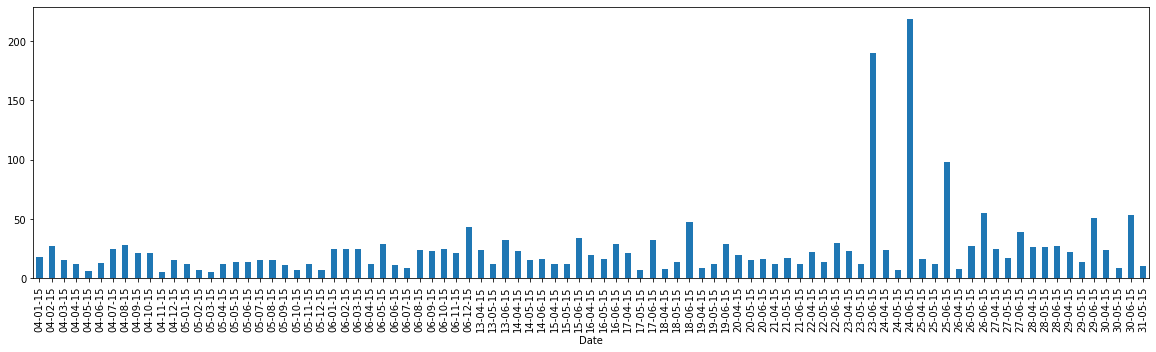

In [224]:
plt.figure(figsize = (20, 5)) #in the inches
comcastdata.groupby("Date").count()["Ticket"].plot(kind = "bar")
plt.xticks(rotation = 90)
plt.show()

#### Trend chart for Monthly granularity level

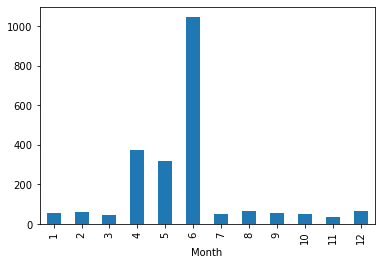

In [225]:
comcastdata.groupby("Month").count()["Ticket"].plot(kind="bar")

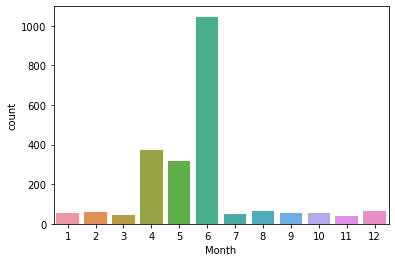

In [226]:
sns.countplot(comcastdata["Month"])


In [230]:
comcastdata.groupby(["Date"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0:"Count"},axis=1)

,Date,Count
0,24-06-15,218
1,23-06-15,190
2,25-06-15,98
3,26-06-15,55
4,30-06-15,53
...,...,...
86,24-05-15,7
87,05-12-15,7
88,04-05-15,6
89,05-03-15,5


In [229]:
comcastdata.groupby(["Month"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0:"Count"},axis=1)

,Month,Count
0,6,1046
1,4,375
2,5,317
3,8,67
4,12,65
5,2,59
6,9,55
7,1,55
8,10,53
9,7,49


---------------------------------------------------------

Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [227]:
# creating new column with only Open and Closed

comcastdata.loc[comcastdata["Status"].str.contains("Closed"),"status"]="Closed"
comcastdata.loc[comcastdata["Status"].str.contains("Open"),"status"]="Open"
comcastdata.loc[comcastdata["Status"].str.contains("Solved"),"status"]="Closed"
comcastdata.loc[comcastdata["Status"].str.contains("Pending"),"status"]="Open"


-------------------------------------

### Groupby state

In [231]:
comcastdata.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0:"Count"},axis=1)

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143
5,Pennsylvania,130
6,Michigan,115
7,Washington,98
8,Colorado,80
9,Maryland,78


In [232]:
StatusComplaints = comcastdata.groupby(["State","status"]).size().unstack().fillna(0)
StatusComplaints

status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


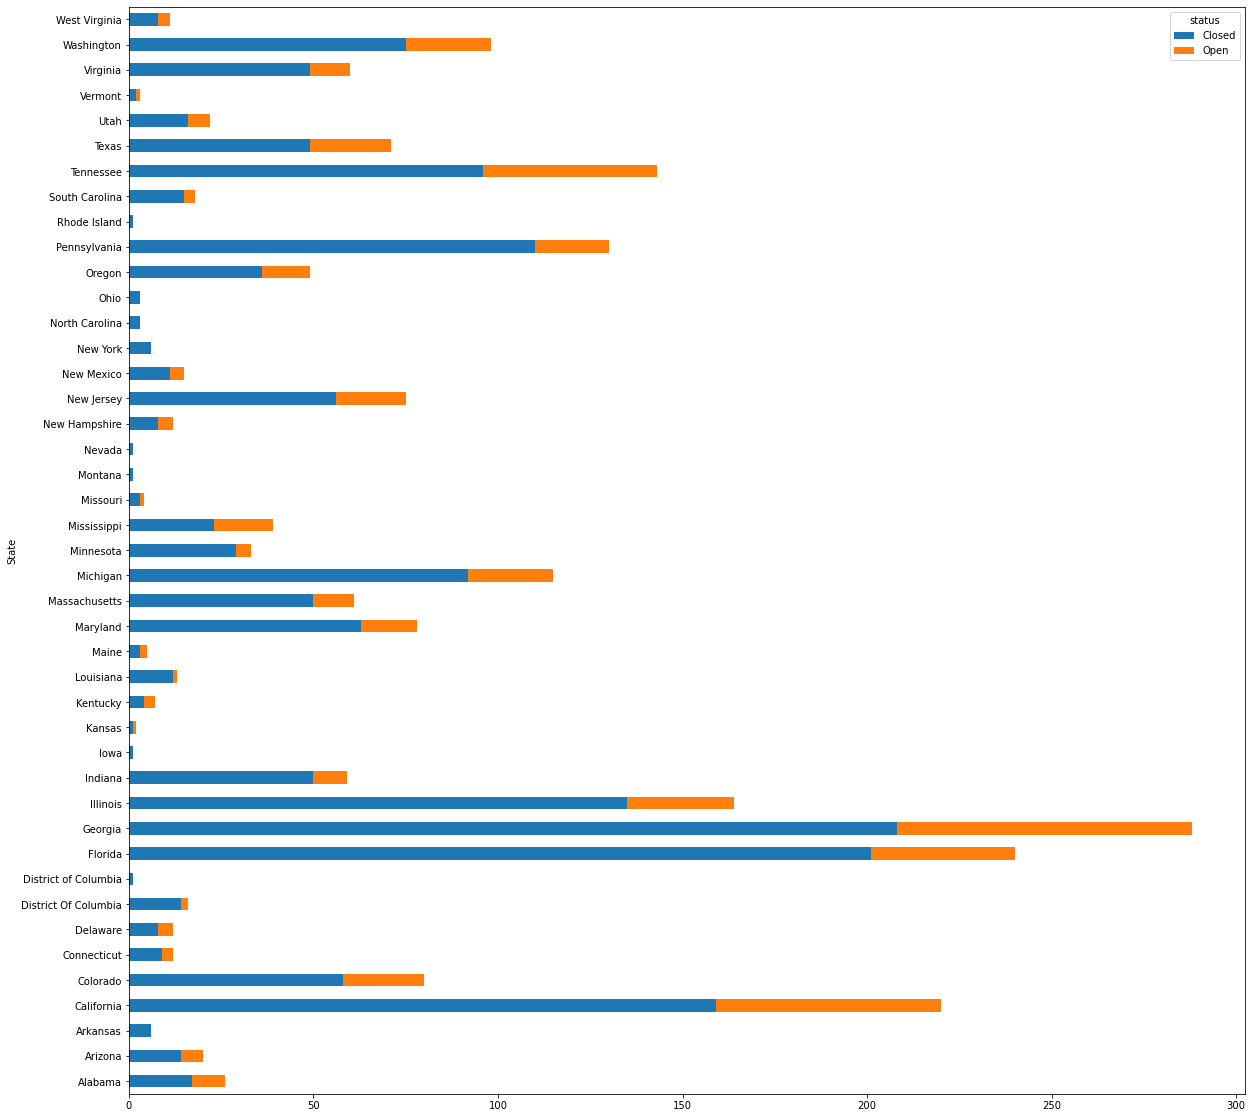

In [233]:
StatusComplaints.plot(kind="barh",figsize=(20,20),stacked=True)

In [234]:
StatusComplaintsmax = comcastdata.groupby(["State","status"]).size().unstack().fillna(0).max()
StatusComplaintsmax

status
Closed    208.0
Open       80.0
dtype: float64

### state which has the maximum complaints

In [235]:
comcastdata.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0:"Count"},axis=1)[:1]

,State,Count
0,Georgia,288


### city which has the maximum complaints

In [236]:
comcastdata.groupby(["City"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0:"Count"},axis=1)[:1]

,City,Count
0,Atlanta,63


## Which state has the highest percentage of unresolved complaints

In [237]:
StatusComplaints = comcastdata.groupby(["State","status"]).size().unstack().fillna(0)
StatusComplaints["Percent of unresolved"] = (StatusComplaints["Open"]/(StatusComplaints["Closed"] + StatusComplaints["Open"]))*100
StatusComplaints.sort_values(ascending=False,by="Percent of unresolved")

status,Closed,Open,Percent of unresolved
State,,,
Kansas,1.0,1.0,50.000000
Kentucky,4.0,3.0,42.857143
Mississippi,23.0,16.0,41.025641
Maine,3.0,2.0,40.000000
Alabama,17.0,9.0,34.615385
Vermont,2.0,1.0,33.333333
Delaware,8.0,4.0,33.333333
New Hampshire,8.0,4.0,33.333333
Tennessee,96.0,47.0,32.867133


In [238]:
StatusComplaints["Open"].sum()

517.0

In [239]:
StatusComplaints["Relative Percent of unresolved"]= (StatusComplaints["Open"]/517)*100
StatusComplaints.sort_values(by="Relative Percent of unresolved",ascending=False)

status,Closed,Open,Percent of unresolved,Relative Percent of unresolved
State,,,,
Georgia,208.0,80.0,27.777778,15.473888
California,159.0,61.0,27.727273,11.798839
Tennessee,96.0,47.0,32.867133,9.090909
Florida,201.0,39.0,16.250000,7.543520
Illinois,135.0,29.0,17.682927,5.609284
Washington,75.0,23.0,23.469388,4.448743
Michigan,92.0,23.0,20.000000,4.448743
Colorado,58.0,22.0,27.500000,4.255319
Texas,49.0,22.0,30.985915,4.255319


State of Kankas has the max percent of unresolved cases that is because it has total of 2 case, one is resolved and the other unresolved hence leading to 50% unresolved.

Highest amount of unresolved case is for the State of Georgia, out of 288 complaints 208 has been resolved, leaving 80 cases that is 27% cases unresolved.

And when we look at relative percentages of unresolved case Georgia contributes to 15.47% of the total unresolved cases, followed by California contributing 11.79%.

------------------------------------------------------------------------

## Percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [240]:
comcastdata["ReceivedVia"].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [246]:
Received=comcastdata.groupby(["status","ReceivedVia"]).size().unstack()
Received

ReceivedVia,Customer Care Call,Internet
status,,
Closed,864,843
Open,255,262


In [248]:
Received["Customer Care Call"].sum(),Received["Internet"].sum()


(1119, 1105)

In [249]:
Percent_carecall = (864/1119)*100
percent_internet = (843/1105)*100
print("Percentage of resolved case which are received through carecall",round(Percent_carecall),"\nPercentage of resolved case which are received through internet",round(percent_internet))

Percentage of resolved case which are received through carecall 77 
Percentage of resolved case which are received through internet 76


-------------------

## Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [45]:

conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [46]:
from wordcloud import WordCloud,STOPWORDS

In [47]:
complainttext = " ".join(comcastdata["CustomerComplaint"])

In [48]:
complainttext = complainttext.lower()

In [130]:
sw = list(STOPWORDS) + ["comcast","complaint","i","the","a","got"]


In [50]:
from string import punctuation

In [51]:
punctuation #includes all the special characters 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
pun = [p for p in punctuation if p not in "'"]

In [53]:
complainttext = "".join([char for char in complainttext if char not in pun ])

In [54]:
val = complainttext.split(" ")
val
uniquecomplaints = []
for v in val:
   # for i in v:
    if v not in uniquecomplaints:
        uniquecomplaints.append(v)
        



In [55]:
swords = list(STOPWORDS) + ["comcast","complaint","got"]

In [56]:
unique = [ char for char in uniquecomplaints if char not in swords]

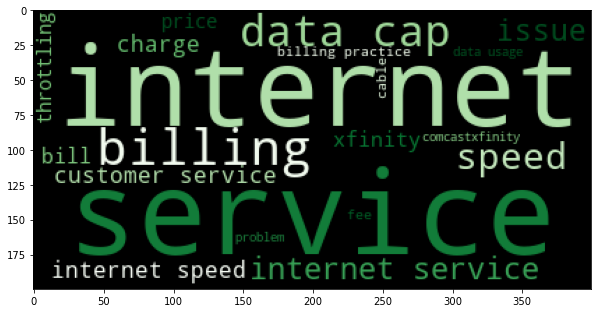

In [254]:
#Wordcloud for frequent keywords appearing in customer complaints

complaintcloud = WordCloud(width=400,height=200,background_color="black",stopwords=sw,random_state=10,max_words=20,normalize_plurals=True,font_step=2,colormap="Greens",prefer_horizontal=.9).generate(complainttext)
plt.figure(figsize=(10,10))
plt.imshow(complaintcloud)
plt.show()

#speed,#billing,#throttling,#service,#internet

In [58]:
df = pd.DataFrame({"index":range(comcastdata.shape[0])})
df[:5]

,index
0,0
1,1
2,2
3,3
4,4


In [59]:
comcastdata["CustomerComplaint"] = comcastdata["CustomerComplaint"].str.lower()

In [60]:
df["price"] = [bool(re.search("price", i)) for i in comcastdata["CustomerComplaint"]]
df["internet"] = [bool(re.search("internet", i)) for i in comcastdata["CustomerComplaint"]]
df["billing"] = [bool(re.search("bill", i)) for i in comcastdata["CustomerComplaint"]]
df["service"] = [bool(re.search("service", i)) for i in comcastdata["CustomerComplaint"]]
df["cable"] = [bool(re.search("cable", i)) for i in comcastdata["CustomerComplaint"]]


In [61]:
df.head(4)

,index,price,internet,billing,service,cable
0,0,False,True,False,False,True
1,1,False,False,False,True,False
2,2,False,False,False,True,False
3,3,False,False,False,False,False


In [62]:
key = ["Price","Internet","Billing","Service","Cable"]


In [63]:
freq = sum(df["price"]),sum(df["internet"]),sum(df["billing"]),sum(df["service"]),sum(df["cable"])
list(freq)

[59, 532, 379, 489, 58]

In [64]:
Table = pd.DataFrame({"Keywords":key,"Frequency":freq})

In [65]:
Table

,Keywords,Frequency
0,Price,59
1,Internet,532
2,Billing,379
3,Service,489
4,Cable,58


-----------------------------------------------

In [152]:
from nltk.corpus import stopwords  

In [153]:
Georgiacomplaints = comcastdata.loc[comcastdata.State=="Georgia",["CustomerComplaint"]]
Georgiacomplaints.head(3)

,CustomerComplaint
1,payment disappear - service got disconnected
2,speed and service
3,comcast imposed a new usage cap of 300gb that ...


In [154]:
ignore = stopwords.words('english')

In [183]:
notallowed=list(ignore) + ["comcast","complaint","i","the","a","got","cap","caps"]

In [184]:
complaintsfromgeorgia = " ".join(Georgiacomplaints["CustomerComplaint"])
complaintsfromgeorgia = "".join([char for char in complaintsfromgeorgia if char not in pun ])
complaintsfromgeorgia.lower()


"payment disappear  service got disconnected speed and service comcast imposed a new usage cap of 300gb that punishes streaming comcast not working and no service to boot isp charging for arbitrary data limits with overage fees throttling service and unreasonable data caps comcast data caps comcast internet data cap xfinity movers edge program comcast data internet usage comcast not refunding my credit comcast no service fraudulent claims reported to collections agency comcast using a data cap to take however much money they like comcast data cap speed of service comcast's monopolistic practices and data capping comcast data cap trials comcast billing problem comcast needs competition comcast servicesbilling issues incorrect bill legality of data caps data caps comcast added service after i declined it comcast misled with overage policy cable service and telephone connect not complete comcast data cap comcast won't cancel my service data caps comcast disconnecting service before due da

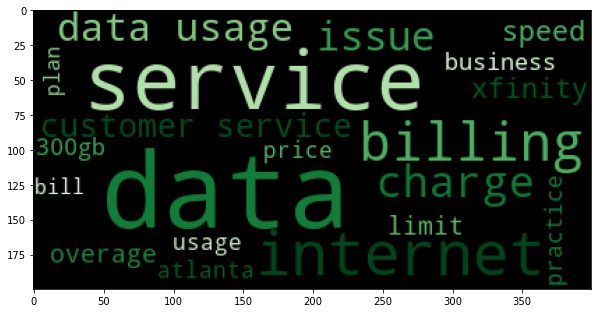

In [253]:
complaintcloud = WordCloud(width=400,height=200,background_color="black",stopwords=notallowed,random_state=10,max_words=20,normalize_plurals=True,font_step=2,colormap="Greens",prefer_horizontal=.9).generate(complaintsfromgeorgia)
plt.figure(figsize=(10,10))
plt.imshow(complaintcloud)
plt.show()

In [186]:
nltk.download('punkt')
corpus = nltk.word_tokenize(complaintsfromgeorgia)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ijedf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [187]:
len(corpus)

1300

In [188]:
filtered_sentence = [w for w in corpus if not w in notallowed]

In [189]:
len(filtered_sentence)

793

In [190]:
wordfreq = {}
for token in filtered_sentence:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1  

In [191]:
print(wordfreq)

{'payment': 1, 'disappear': 1, 'service': 59, 'disconnected': 2, 'speed': 9, 'imposed': 2, 'new': 2, 'usage': 21, '300gb': 7, 'punishes': 1, 'streaming': 1, 'working': 1, 'boot': 1, 'isp': 1, 'charging': 3, 'arbitrary': 1, 'data': 99, 'limits': 4, 'overage': 6, 'fees': 2, 'throttling': 2, 'unreasonable': 1, 'internet': 39, 'xfinity': 10, 'movers': 1, 'edge': 1, 'program': 1, 'refunding': 1, 'credit': 2, 'fraudulent': 3, 'claims': 1, 'reported': 1, 'collections': 1, 'agency': 1, 'using': 2, 'take': 1, 'however': 1, 'much': 1, 'money': 2, 'like': 2, "'s": 3, 'monopolistic': 1, 'practices': 5, 'capping': 1, 'trials': 1, 'billing': 27, 'problem': 2, 'needs': 1, 'competition': 2, 'servicesbilling': 1, 'issues': 12, 'incorrect': 2, 'bill': 5, 'legality': 1, 'added': 2, 'declined': 1, 'misled': 1, 'policy': 1, 'cable': 2, 'telephone': 1, 'connect': 1, 'complete': 1, 'wo': 2, "n't": 4, 'cancel': 2, 'disconnecting': 1, 'due': 1, 'date': 1, 'unbelievable': 1, 'treatment': 1, 'denial': 2, 'busine

In [192]:
len(wordfreq)

353

In [250]:
import heapq
most_freq = heapq.nlargest(5, wordfreq, key=wordfreq.get)

In [255]:
#Top 5 keywords in complaints coming from Georgia
most_freq

['data', 'service', 'internet', 'billing', 'usage']

--------------------------------

## Insights

 - Most complaints were received in June (1046).
 - Most complaints are received from Georgia (288).
     - out of 288, 208 are solved and 80 are still open
 - Atlanta a city in Georgia receives most complaints (63).
 - Most complaints were received via customer call
 - Majority of the complaints have Solved status
 - 23,24,25th of June 2015 received a hike in complaints
     - 24th 218, 23rd 190, 25th 98
 - State of Kankas has the max percent of unresolved cases that is because it has total of 2 case, one is resolved and the other unresolved hence leading to 50% unresolved case for that state.
 - Unresolved case for the State of Georgia, out of 288 complaints 208 has been resolved, leaving 80 unresolved cases that is 27% cases unresolved for the state of Georgia.
 - And when we look at relative percentages of unresolved case Georgia contributes to 15.47% of the total unresolved cases, followed by California contributing 11.79%.
 - Out of 1119 cases received via carecall 864 cases are solved leaving 255 cases unresolved.
 - Out of 1105 cases received via internet 843 cases are resolved leaving 262 cases unresolved.
 - 77% of cases received via carecall has been resolved
 - 76% of cases received via carecall has been resolved
 - Most Issues revolve around the keywords-> Internet,Service,Billing,Cable,Price